<a href="https://colab.research.google.com/github/BitNinja27/FCC_Cat_and_Dog_ImageClassifier/blob/main/Cat_%26_Dog_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150

--2024-07-03 14:22:42--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip.1’

cats_and_dogs.zip.1 100%[===================>]  67.43M   297MB/s    in 0.2s    

2024-07-03 14:22:43 (297 MB/s) - ‘cats_and_dogs.zip.1’ saved [70702765/70702765]

Archive:  cats_and_dogs.zip
replace cats_and_dogs/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# 3
train_image_generator = ImageDataGenerator(
  total_train,
  rescale = 1/255.0,
)
validation_image_generator = ImageDataGenerator(
  total_val,
  rescale = 1/255.0,
)
test_image_generator = ImageDataGenerator(
  total_test,
  rescale = 1/255.0,
)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size = (IMG_WIDTH, IMG_HEIGHT),
    batch_size = batch_size,
    class_mode = 'binary'
)
val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size = (IMG_WIDTH, IMG_HEIGHT),
    batch_size = batch_size,
    class_mode = 'binary'
)
test_data_gen = test_image_generator.flow_from_directory(
    PATH,
    classes = ['test'],
    target_size = (IMG_WIDTH, IMG_HEIGHT),
    batch_size = 50,
    class_mode = 'binary',
    shuffle = False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


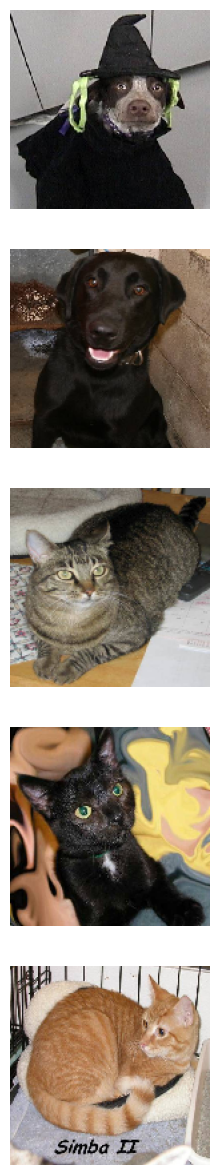

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
from ssl import VERIFY_X509_TRUSTED_FIRST
# 5
train_image_generator = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest',
rescale = 1/255.0)


Found 2000 images belonging to 2 classes.


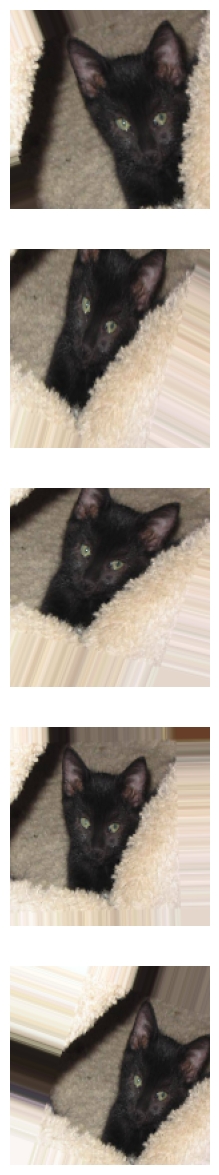

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 73984)            

In [ ]:
# 8
history = model.fit(train_data_gen, steps_per_epoch=total_train // batch_size, epochs=epochs,
                    validation_data=val_data_gen, validation_steps= total_val // batch_size)

Epoch 1/20
15/15 [==============================] - 18s 1s/step - loss: 0.8957 - accuracy: 0.5267 - val_loss: 0.6928 - val_accuracy: 0.5067
Epoch 2/20
15/15 [==============================] - 17s 1s/step - loss: 0.6912 - accuracy: 0.5198 - val_loss: 0.6922 - val_accuracy: 0.5056
Epoch 3/20
15/15 [==============================] - 16s 1s/step - loss: 0.6900 - accuracy: 0.5192 - val_loss: 0.6814 - val_accuracy: 0.5089
Epoch 4/20
15/15 [==============================] - 16s 1s/step - loss: 0.6716 - accuracy: 0.5609 - val_loss: 0.8596 - val_accuracy: 0.5201
Epoch 5/20
15/15 [==============================] - 18s 1s/step - loss: 0.6848 - accuracy: 0.5568 - val_loss: 0.6860 - val_accuracy: 0.5558
Epoch 6/20
15/15 [==============================] - 17s 1s/step - loss: 0.6807 - accuracy: 0.5828 - val_loss: 0.6741 - val_accuracy: 0.6004
Epoch 7/20
15/15 [==============================] - 16s 1s/step - loss: 0.6662 - accuracy: 0.5978 - val_loss: 0.6612 - val_accuracy: 0.5859
Epoch 8/20
15/15 [==

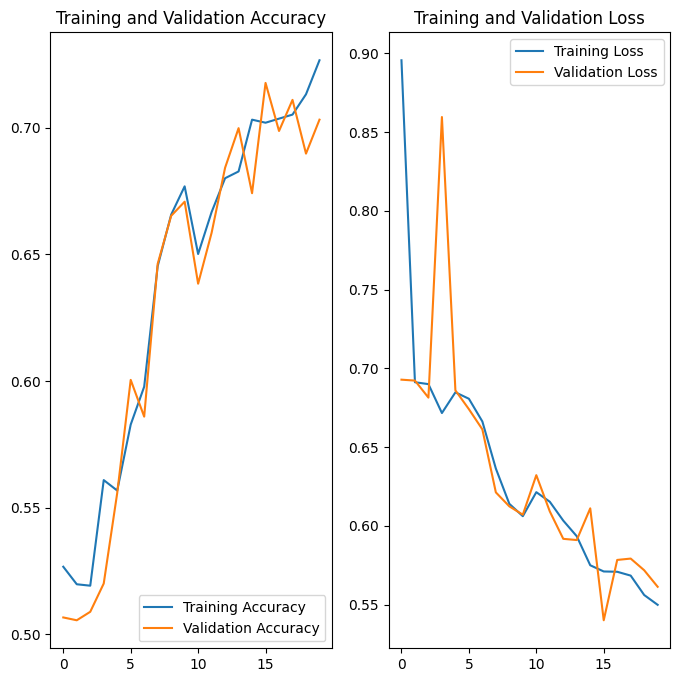

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
probabilities = np.argmax(model.predict(test_data_gen), axis=-1)

1/1 [==============================] - 0s 180ms/step


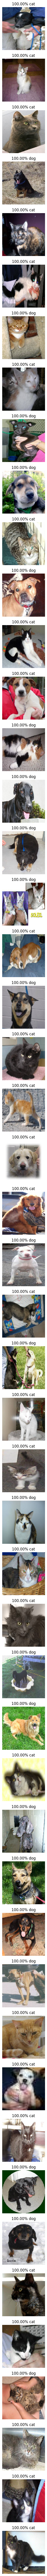

In [ ]:
test_images, _ = next(test_data_gen)
plotImages(test_images, probabilities = probabilities)

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 76.0% of the images of cats and dogs.
You passed the challenge!
